<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/TempSeries_atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CESAR School Recife**

Alunos: *Erike Simon, José Aparecido*

Atividade 1:

* Escolher 3 séries temporais compartilhadas e realize uma estatística descritiva. Não usar a série do Arline nem a do Itausa;
* Existe uma série em anexo chamada sem_nome.csv, também a utilize para as análises;
* Análise da função de autocorrelação e autocorrelação parcial. O que  você identificou na série? sazonalidade, tendência, se é um ruído branco, random walk, quais lags são os mais importantes (caso exista);
* Análise de estacionariedede e diferenças;
* Resumo escrito da análise para as 4 séries.

## Configurações iniciais

In [ ]:
pip install pydataset pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.1 MB/s eta 0:00:00
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=c7f85a6e9e9c4766f7322b6ce8d6b82efb4d930dc409118893fbd39caa707364
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [ ]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import KPSSTest
from google.colab import drive

initiated datasets repo at: /root/.pydataset/


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Análise do dataset 'coloradoRiver'

coloradoRiver.txt:
* Monthly River Flows (Colorado River Lees Ferry, 1911–1972)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Séries Temporais/ts_datasets/bases/coloradoRiver.txt') #/content/drive/MyDrive/Colab Notebooks/Séries Temporais/ts_datasets/bases/coloradoRiver.txt
df.head()

,0.46
0,0.53
1,1.24
2,1.48
3,3.69
4,4.57


Note que o primeiro valor original aparentemente foi nomeado como a coluna. Para não perder esse valor, desloca-se todos os valores um índice a frente para inserir 0.46 como primeiro valor (índice 0). Um ajuste no índice e a criação de uma coluna 'time' foi feita para ajuste do dataset.

In [ ]:
# Ajuste e recuperação do primeiro valor
df.columns = ['rflow']
df['rflow'] = df['rflow'].shift(1)
df.loc[0, 'rflow'] = 0.46

# Nova coluna para tempo
df['time'] = range(len(df))
# Tornando-a índice
df = df.set_index('time')
# Transformando-a em coluna
#ts = ts.reset_index()
df

,rflow
time,
0,0.46
1,0.53
2,1.24
3,1.48
4,3.69
...,...
738,1.11
739,1.23
740,1.14


Função para cálculo da média móvel

In [ ]:
# Função para cálculo e plot da média móvel
def show_tendencia(ts, rm_size):
  df_show = pd.DataFrame()

  df_show['serie'] = ts.values[rm_size:]
  df_show['rm'] = ts.rolling(rm_size).mean().values[rm_size:]

  df_show['date'] = ts.index.to_list()[rm_size:]
  df_show.set_index('date', inplace=True)
  df_show.plot()
  plt.show()

Plot da média móvel para a série Colorado River

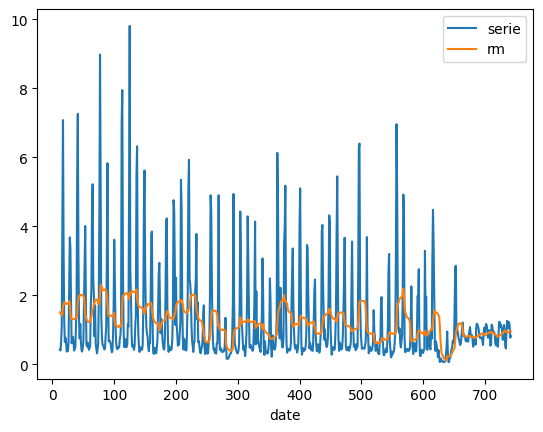

In [ ]:
ts = df['rflow']
rm_size = 12
show_tendencia(ts, rm_size)

Observa-se uma sazonalidade e uma aparente estacionariedade na série, devido a curva de média móvel.

Plot das funções de autocorrelação (ACF) e autocorrelação parcial (PACF) para a série Colorado River

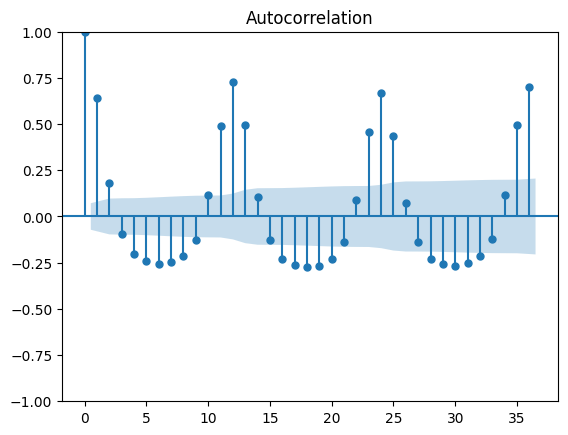

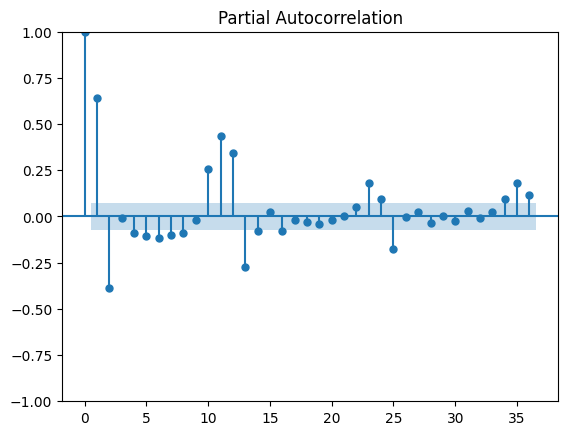

In [ ]:
ts = df['rflow']
plot_acf(ts, lags=36)
plt.show()
plot_pacf(ts, lags=36)
plt.show()

Uma **sazonalidade** se mostra tanto na **ACF** como na **PACF** a cada 12 lags (12 meses, 1 ano). Ou seja, temos um grau de correlação cíclico entre os intervalos.

Teste de estacionariedade **KPSS** na série Colorado River

O teste KPSS é usado para verificar se uma série temporal é estacionária ao testar a hipótese nula de que a série é estacionária em torno de uma tendência determinística, especificamente, em torno de uma média móvel.

A estacionariedade em séries temporais é uma propriedade importante que implica que as propriedades estatísticas da série não mudam com o tempo. A série temporal estacionária é mais fácil de modelar e prever, o que a torna útil em análises de séries temporais.

In [ ]:
ts = df['rflow']

kpss = KPSSTest()
kpss.should_diff(ts)

(0.01, True)

O método 'shold_diff' avalia se a série temporal requer diferenciação para se tornar estacionária. Em outras palavras, ele testa se a série é estacionária em torno de uma tendência determinística. Se o valor retornado for *True*, isso sugere que a série não é estacionária e requer diferenciação para se tornar estacionária. Se o valor retornado for *False*, isso sugere que a série já é estacionária em torno de uma tendência determinística. Então pelo teste KPSS aplicado a série Colorado River, está não é estacionária como sugere a abservação visual dos seus gráficos.

<Axes: xlabel='time'>

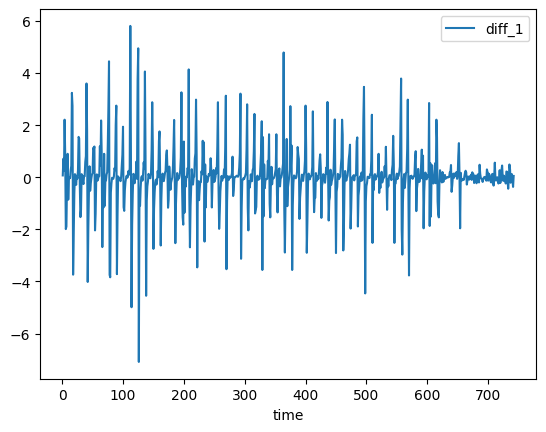

In [ ]:
df_diff = pd.DataFrame() # dataframe para armazenar os valores da série diferenciada
df_diff['diff_1'] = ts.diff().iloc[1:] # O método iloc[1:] é usado para descartar o primeiro elemento,
                                       # pois a primeira diferença não pode ser calculada para o primeiro elemento.
df_diff.plot()

A diferenciação é uma técnica comum em análise de séries temporais e é usada para tornar uma série temporal mais estacionária, facilitando a modelagem e a previsão. A escolha da abordagem de diferenciação depende do contexto e dos objetivos específicos da análise da série temporal.

Após a diferenciação na série Colorado River, um novo teste KPSS é aplicado abaixo e observa-se a não necessidade de uma nova diferenciação.

In [ ]:
ts = df_diff['diff_1']

kpss = KPSSTest()
kpss.should_diff(ts)

(0.1, False)

Plot das funções de autocorrelação (ACF) e autocorrelação parcial (PACF) para a série Colorado River após a diferenciação

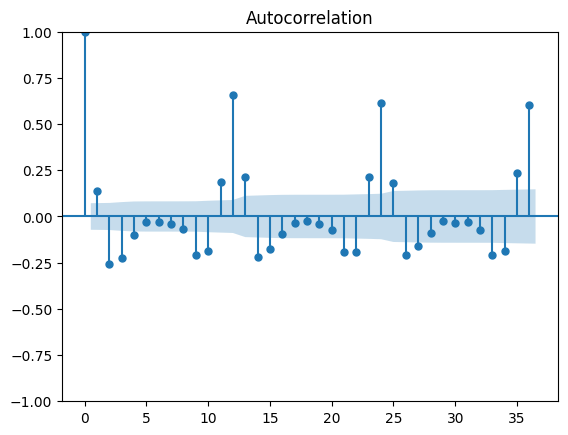

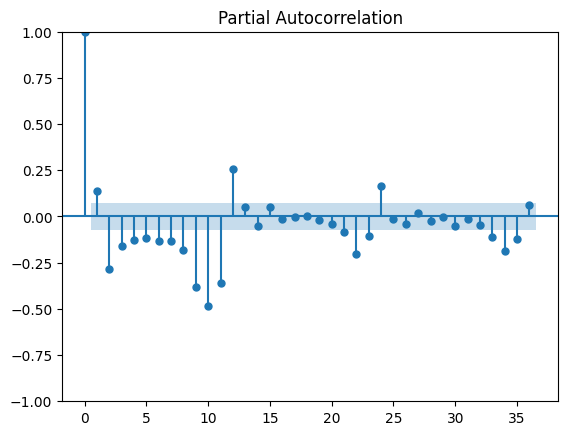

In [ ]:
ts = df_diff['diff_1']
plot_acf(ts, lags=36)
plt.show()
plot_pacf(ts, lags=36)
plt.show()

De fato a sazonalidade a cada 12 *lags* fica bem pronunciada analisando principalmente a **ACF**.

## Análise do dataset 'lakeerie'

lakeerie.txt:
* Monthly Lake Levels (Lake Erie, 1921–1970)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Séries Temporais/ts_datasets/bases/lakeerie.txt') #/content/gdrive/MyDrive/Colab Notebooks/data/lakeerie.txt
df.head()

,14.7630
0,14.649
1,15.085
2,16.376
3,16.926
4,16.774


In [ ]:
# Ajuste e recuperação do primeiro valor
df.columns = ['level']
df['level'] = df['level'].shift(1)
df.loc[0, 'level'] = 14.7630

# Ajuste e formatação da datas
df['date'] = pd.date_range(
    start='1921-01-01', end= '1970-12-01', freq='M'
  )
df.set_index('date', inplace=True)

df.head()

,level
date,
1921-01-31,14.763
1921-02-28,14.649
1921-03-31,15.085
1921-04-30,16.376
1921-05-31,16.926


<Axes: xlabel='date'>

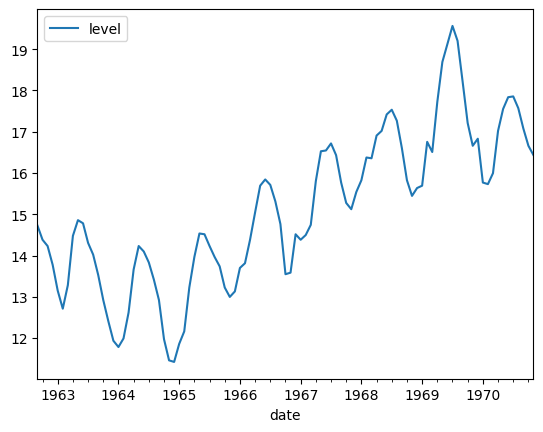

In [ ]:
df[500:].plot()

Observa-se a uma **sazonalidade** em torno de 12 meses.

Plot da média móvel para a série Lake Erie

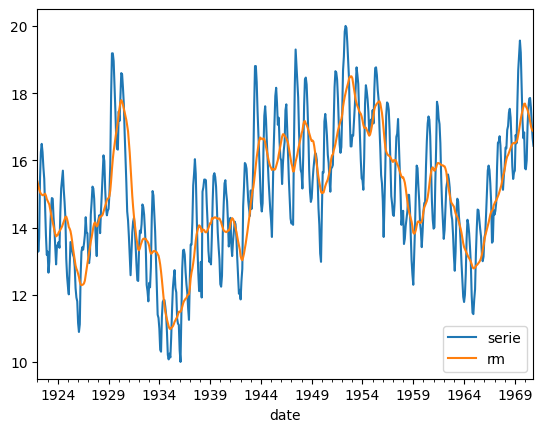

In [ ]:
ts = df['level']
rm_size = 12
show_tendencia(ts, rm_size)

Além da **sazonalidade** obervada, também é possível notar uma **ciclicidade** (subidas e descidas que não ocorrem em um intervalo fixo) na série. O primeiro ciclo que se pode observar se inicia em 1926 e termina por volta de 1936.

Plot das funções de autocorrelação (ACF) e autocorrelação parcial (PACF) para a série lakeerie

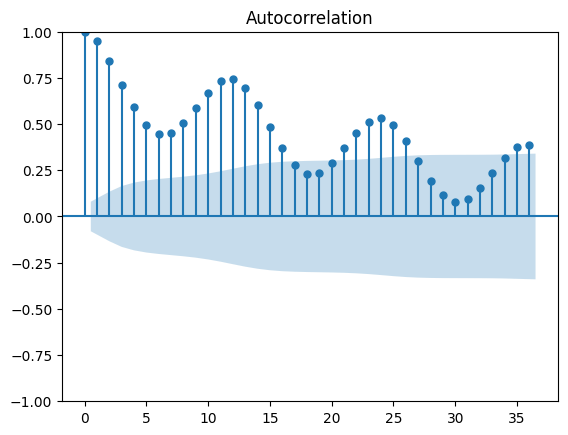

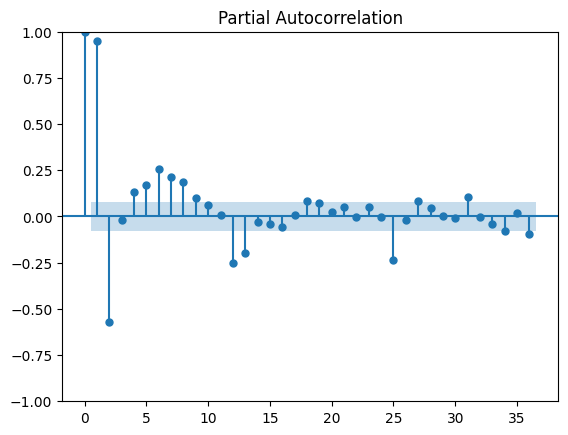

In [ ]:
ts = df['level']
plot_acf(ts, lags=36)
plt.show()
plot_pacf(ts, lags=36)
plt.show()

Observa-se uma clara **tendência** na série e também uma **sazonalidade** de cerca de 12 lags (1 ano).

Teste de estacionariedade **KPSS** na série lakeerie

In [ ]:
ts = df['level']

kpss = KPSSTest()
kpss.should_diff(ts)

(0.01, True)

Requer diferenciação, logo não é uma série estacionária (como já identificado)

Plot da série lakeerie diferenciada

<Axes: xlabel='date'>

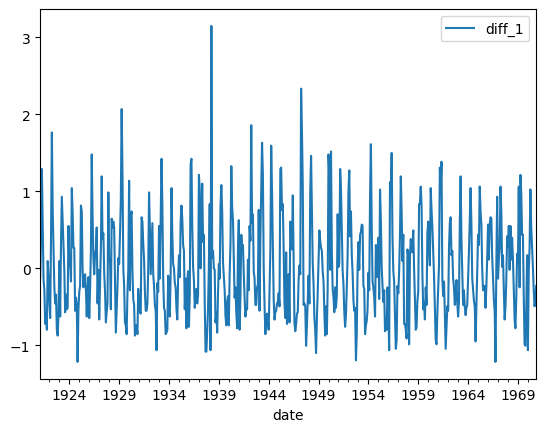

In [ ]:
df_diff = pd.DataFrame() # dataframe para armazenar os valores da série diferenciada
df_diff['diff_1'] = ts.diff().iloc[1:] # O método iloc[1:] é usado para descartar o primeiro elemento,
                                       # pois a primeira diferença não pode ser calculada para o primeiro elemento.
df_diff.plot()

In [ ]:
ts = df_diff['diff_1']

kpss = KPSSTest()
kpss.should_diff(ts)

(0.1, False)

Um novo teste KPSS indica que não há necessidade de mais uma diferenciação. A série agora é estacionária.

Plot das funções de autocorrelação (ACF) e autocorrelação parcial (PACF) para a série lakeerie após a diferenciação

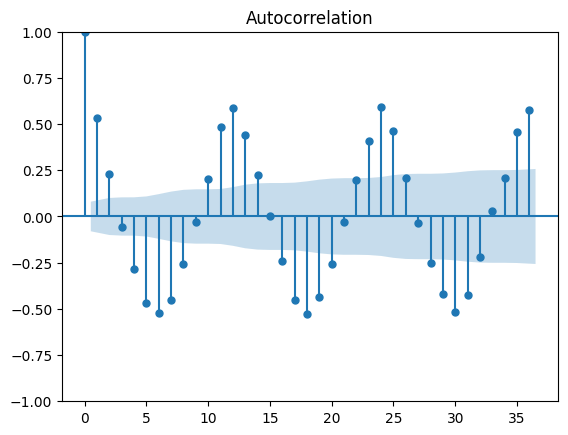

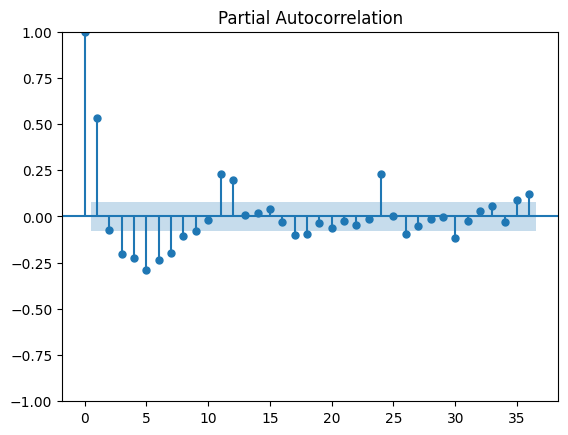

In [ ]:
ts = df_diff['diff_1']
plot_acf(ts, lags=36)
plt.show()
plot_pacf(ts, lags=36)
plt.show()

Após a diferenciação, a **tendência** não mais aparece nas funções. A **sazonalidade** de 12 *lags* torna-se ainda mais pronunciada principalmente na **ACF**.

## Análise do dataset 'ibm'

ibm.txt
* Daily closing price of IBM stock, Jan 1, 1980 to Oct. 8, 1992    


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Séries Temporais/ts_datasets/bases/ibm.txt')#/content/gdrive/MyDrive/Colab Notebooks/data/ibm.txt
df.head()

,460
0,457
1,452
2,459
3,462
4,459


In [ ]:
# Ajuste e recuperação do primeiro valor
df.columns = ['close_price']
df['close_price'] = df['close_price'].shift(1)
df.loc[0, 'close_price'] = 460

# Criando e setando uma nova coluna para o tempo
df['date'] = range(len(df))
df.set_index('date', inplace=True)

df.head()

,close_price
date,
0,460.0
1,457.0
2,452.0
3,459.0
4,462.0


Plot da média móvel

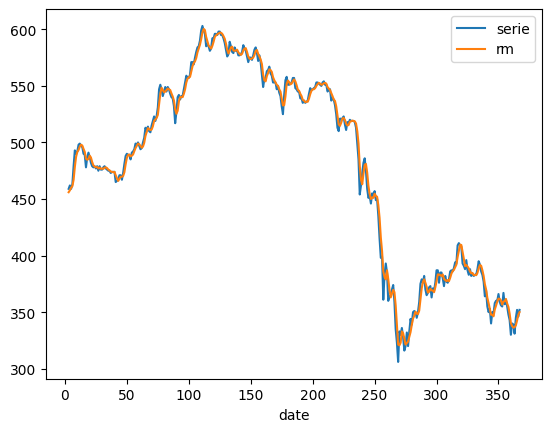

In [ ]:
ts = df['close_price']
rm_size = 3
show_tendencia(ts, rm_size)

Não é possível notar alguma sazonalidade, ciclicidade ou estacionariedade na série, porém, observa-se tendência na descendente

Plot das funções de autocorrelação (ACF) e autocorrelação parcial (PACF) para a série ibm

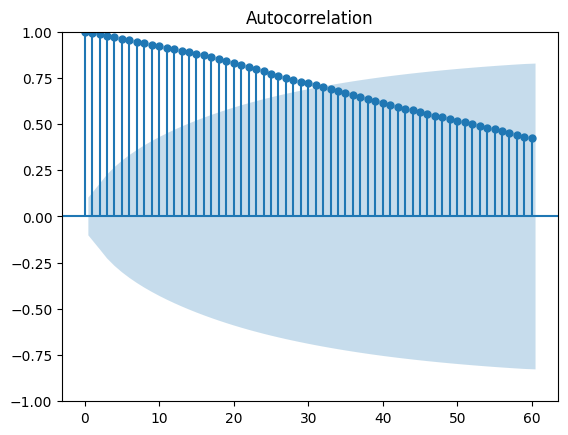

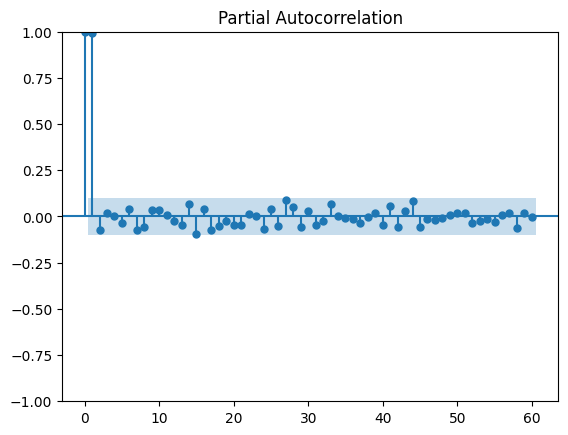

In [ ]:
ts = df['close_price']
plot_acf(ts, lags=60)
plt.show()
plot_pacf(ts, lags=60)
plt.show()

Pela ACF, temos uma tendência como já observado anteriormente e pela PACF um **Random Walk**.

Teste de estacionariedade KPSS na série ibm

In [ ]:
ts = df['close_price']

kpss = KPSSTest()
kpss.should_diff(ts)

(0.01, True)

In [ ]:
df_diff = pd.DataFrame() # dataframe para armazenar os valores da série diferenciada
df_diff['diff_1'] = ts.diff().iloc[1:] # O método iloc[1:] é usado para descartar o primeiro elemento,
                                       # pois a primeira diferença não pode ser calculada para o primeiro elemento.

In [ ]:
ts = df_diff['diff_1']

kpss = KPSSTest()
kpss.should_diff(ts)

(0.04408782501847765, True)

O segundo teste indica que requer uma segunda diferenciação

<Axes: xlabel='date'>

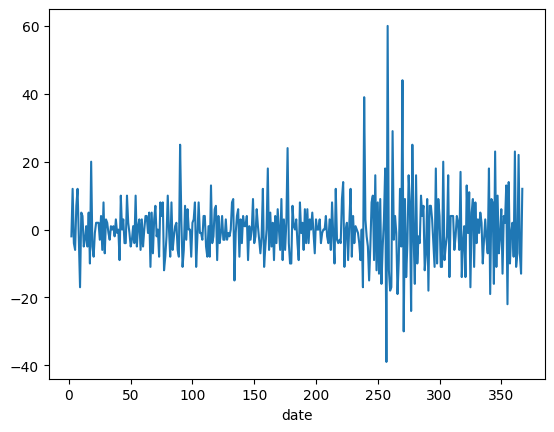

In [ ]:
df_diff['diff_2'] = ts.diff().iloc[1:] # O método iloc[1:] é usado para descartar o primeiro elemento,
                                       # pois a primeira diferença não pode ser calculada para o primeiro elemento.
df_diff['diff_2'].plot()

In [ ]:
df_diff.dropna(inplace=True)

In [ ]:
ts = df_diff['diff_2']

kpss = KPSSTest()
kpss.should_diff(ts)

(0.1, False)

Um último teste KPSS indica que não é necessária mais nenhuma diferenciação

Plot das funções de autocorrelação (ACF) e autocorrelação parcial (PACF) para a série ibm após as diferenciações

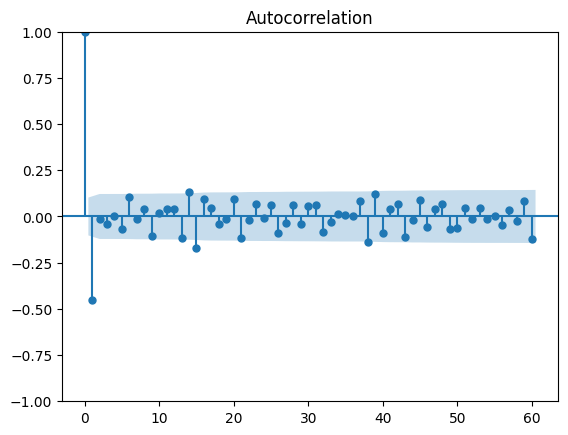

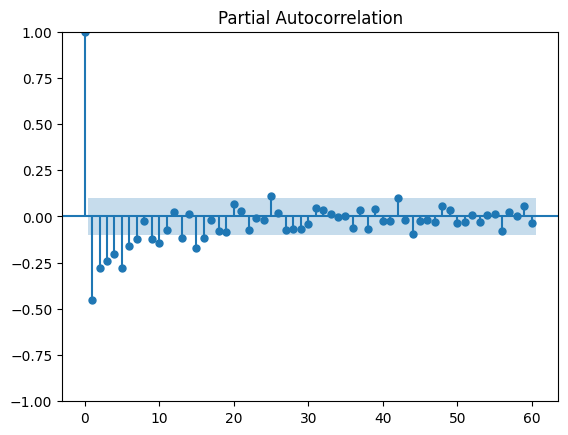

In [ ]:
ts = df_diff['diff_2']
plot_acf(ts, lags=60)
plt.show()
plot_pacf(ts, lags=60)
plt.show()

De fato observando as funções de correlação após a diferenciação da série, é o caso de um **Random Walk**. Ou seja, a série possui mudanças repentinas e imprevisíveis.

## Análise do dataset 'sem-nome'

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Séries Temporais/Atividade/sem_nome.csv') #/content/gdrive/MyDrive/Colab Notebooks/data/sem-nome.csv
df.head()

,Unnamed: 0,actual
0,0,-0.852753
1,1,-1.703346
2,2,-0.451841
3,3,0.392410
4,4,0.498923


Ajuste de índice e nome das colunas

In [ ]:
df.columns = ['time', 'actual']
df.set_index('time', inplace=True)
df.head()

,actual
time,
0,-0.852753
1,-1.703346
2,-0.451841
3,0.392410
4,0.498923


**Plot da série**

<Axes: xlabel='time'>

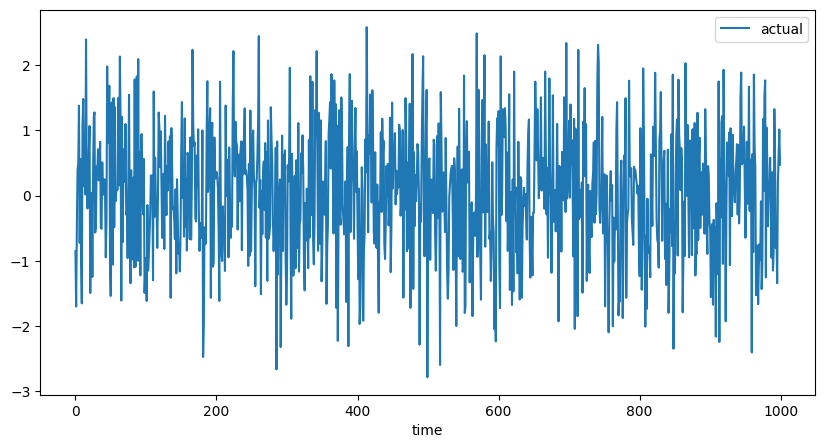

In [ ]:
df.plot(figsize=(10,5))

<Axes: xlabel='time'>

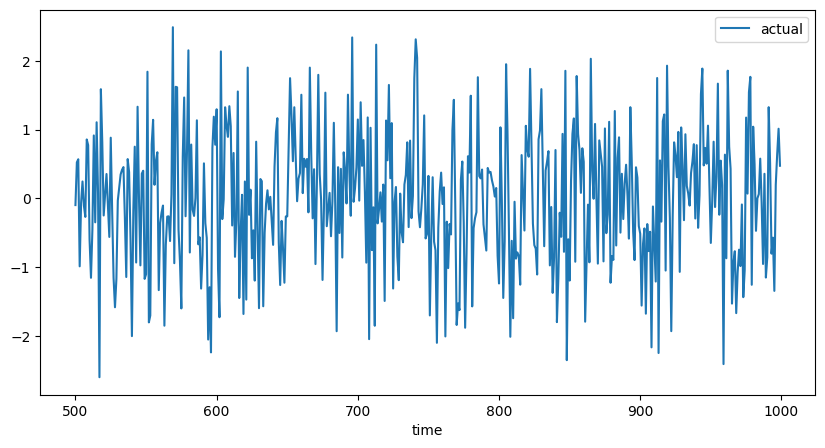

In [ ]:
df[500:].plot(figsize=(10,5))

### Plot média rolante

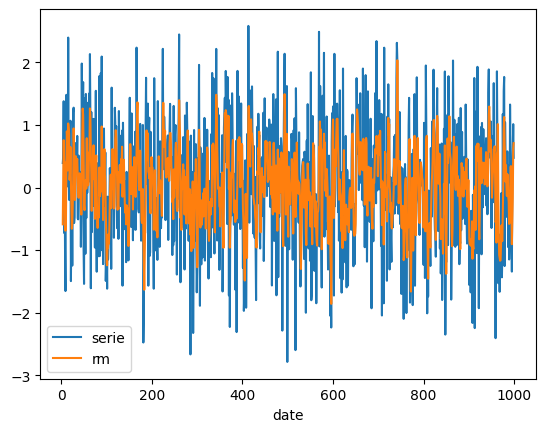

In [ ]:
ts_serie_desconhecida = df['actual']
rm_size = 3
show_tendencia(ts_serie_desconhecida, rm_size)

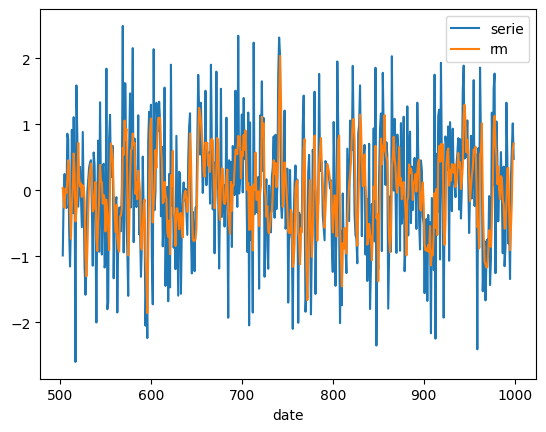

In [ ]:
rm_size = 3
show_tendencia(ts_serie_desconhecida[500:], rm_size)

Em uma primeira análise, apenas olhando para os gráficos, não é visível a existência de tendência ou sazonalidade na série.

### Plot das funções de autocorrelação (ACF) e autocorrelação parcial (PACF) para a série sem nome.

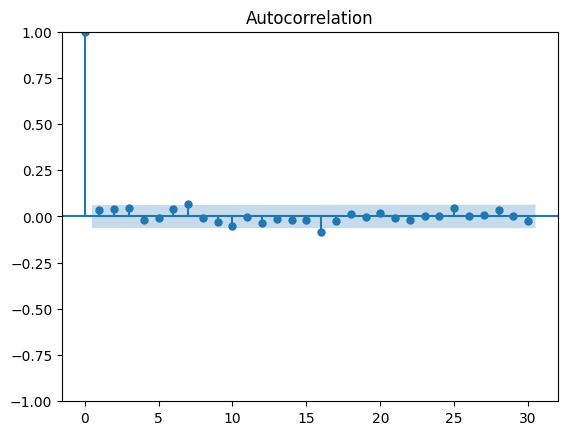

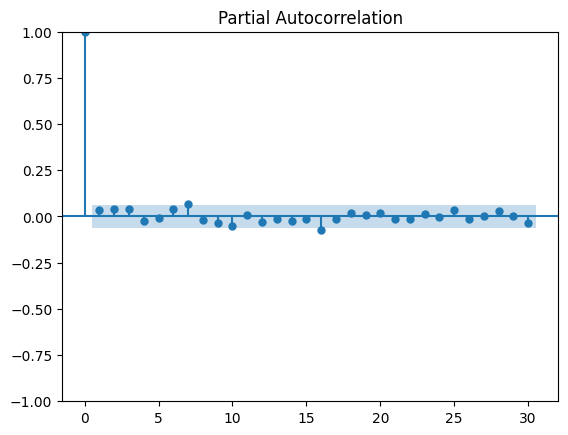

In [ ]:
plot_acf(ts_serie_desconhecida, lags=30)
plt.show()
plot_pacf(ts_serie_desconhecida, lags=30)
plt.show()

### Teste de estacionariedade **KPSS** na série sem nome

In [ ]:
kpss = KPSSTest()
kpss.should_diff(ts_serie_desconhecida)

(0.1, False)

O resultado do teste KPSS indica que não é necessário realizar a diferenciação, logo a série não possui tendência e se trata de uma série estacionária.

A partir dessa análise, é muito provável que essa série seja um ruído branco. Pois, a série não possui autocorrelações relevantes, e nem sazonalidade.

# Resumo das análises

**Série: coloradoRiver**

Essa série representa o fluxo mensal do rio Colorado entre os anos 1911 e 1972. Inicialmente observamos uma sazonalidade e uma aparente estacionariedade na série. Essa primeira impressão foi confirmada após aplicar a diferenciação e analisar os gráficos de autocorrelação e autocorrelação parcial.


---


**Série: lakeerie**

Essa série representa o nível mensal do lago Erie ao longo dos anos 1921 a 1970. A partir dos primeiros gráficos, observamos um comportamento semelhante à sazonalidade, ciclicidade e tendência negativa.

O teste do KPSS indicou que a série necessitava de diferenciação, após a aplicação de diferenciação a tendência foi removida e a sazonalidade de 12 lags tornou-se ainda mais pronunciada nos gráficos de ACF e PACF.



---


**Série: IBM**

Essa série representa o valor de fechamento da ação da IBM durante o período de 01/01/1980 até 08/10/1992. Logo nos primeiros gráficos, é possível perceber que a série não apresenta qualquer sazonalidade ou ciclicidade. No entanto, ela parece ter uma tendência descendente.
    
Pela PACF notamos um comportamento semelhante ao **Randon Walk**. Após aplicarmos a diferenciação, e plotarmos os gráficos das funções de autocorrelação e autocorrelação parcial, constatamos que se trata de um Random Walk. Ou seja, a série apresenta mudanças repentinas e imprevisiveis.



---


**Série: sem-nome**

Nos primeiros gráficos notamos uma total falta de padrão nessa série, não é possível observar sazonalidade, ou ciclicidade, e nem tendência. O teste KPSS indicou que não é necessário realizar a diferenciação, logo a série não possui tendência e se trata de uma série estacionária. Essa série tem o comportamento de um ruído branco.